### Financial Analytics Challenge

#### Description Of The Data: The data is of indices of specific sector based assets of a country. The following are the description of each attribute:

- serial_number: Unique identifier for each tuple
- time_stamp: The time at which the index value was recorded
- Sector 1…..Sector 4: Combined index values of all assets attached to the specific sector.

#### Objective Of The Problem: 
- The Objective of the problem is to predict the values for “Sector 3” variable along with corresponding serial number as in the Test dataset. Please note that all predictions are to be made on the Test dataset only. Please write all predictions to a CSV file and upload on the Skillenza platform. The sample submission file is given as an example of how the correct labels should be.

#### Files Provided:
- Training: All features including the variable to predict out of the test dataset. This data set is to be used for training and validation.
- Test: The feature to predict is missing in this file and the same is to be predicted.
- Sample Submission: This file is an example of how the correct submission file is to be written.


#### Evaluation: 
- The submitted prediction file is compared with correct labels file using Root Mean Squared Error. The result is normalized to 100 using the stated normalization constant and reflected on the leader board.


#### Evaluation Algorithm
- Root Mean Square Error (RMSE)
- normalization_constant 10000

## Importing the libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

C:\Users\Vishal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the "fs1_training.csv" dataset :

In [2]:
d_train = pd.read_csv('fs1_training.csv')

d_train.head()

,serial_number,time_stamp,Sector 1,Sector 2,Sector 3,Sector 4
0,1,2016-03-21,1125.36,458.49,2048.98,1275.00
1,2,2016-03-18,1120.10,458.49,2048.98,1242.46
2,3,2016-03-17,1120.10,458.49,2048.98,1242.46
3,4,2016-03-16,1117.84,458.49,2048.98,1228.52
4,5,2016-03-15,1114.08,458.49,2048.98,1205.28


In [3]:
d_train.shape

(1049, 6)

In [4]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   serial_number  1049 non-null   int64  
 1   time_stamp     1049 non-null   object 
 2   Sector 1       1049 non-null   float64
 3   Sector 2       1049 non-null   float64
 4   Sector 3       1049 non-null   float64
 5   Sector 4       1049 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 49.3+ KB


In [5]:
d_train.isnull().sum()

serial_number    0
time_stamp       0
Sector 1         0
Sector 2         0
Sector 3         0
Sector 4         0
dtype: int64

In [6]:
d_train.describe(include='all')

,serial_number,time_stamp,Sector 1,Sector 2,Sector 3,Sector 4
count,1049.000000,1049,1049.000000,1049.000000,1049.000000,1049.000000
unique,NaN,1049,NaN,NaN,NaN,NaN
top,NaN,2013-06-19,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN
mean,525.000000,NaN,1114.234004,650.464405,1801.274260,1340.708251
std,302.964519,NaN,88.396753,149.793374,205.363957,143.356251
min,1.000000,NaN,114.270000,441.430000,1047.340000,14.580000
25%,263.000000,NaN,1042.583400,559.130000,1622.360000,1195.189900
50%,525.000000,NaN,1115.980000,594.530000,1770.760000,1333.130000
75%,787.000000,NaN,1191.939900,733.990000,2039.150000,1477.600000


### Counting the Outlier in given dataset :

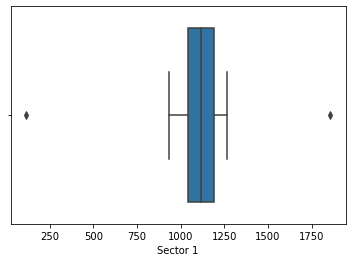

In [7]:
sb.boxplot(d_train['Sector 1'])

In [8]:
q1 = d_train['Sector 1'].quantile(0.25)
q3 = d_train['Sector 1'].quantile(0.75) 
iqr = q3 - q1
print(iqr)
UB = q3 + 1.5 * iqr
LB = q1 - 1.5 * iqr
print('Outlier in Upper Bound: ',len(d_train[d_train['Sector 1']>UB]))
print('Outlier in Lower Bound: ',len(d_train[d_train['Sector 1']<LB]))
print(UB,'&',LB)
print("The min value is",d_train["Sector 1"].min(),"& The max value is ",d_train["Sector 1"].max())

149.3565000000001
Outlier in Upper Bound:  1
Outlier in Lower Bound:  1
1415.97465 & 818.5486499999998
The min value is 114.27 & The max value is  1856.0699


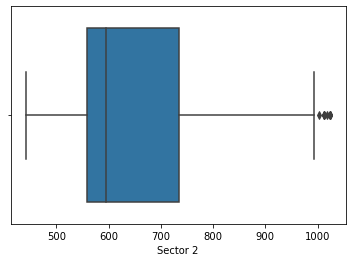

In [9]:
sb.boxplot(d_train['Sector 2'])

In [10]:
q1 = d_train['Sector 2'].quantile(0.25)
q3 = d_train['Sector 2'].quantile(0.75) 
iqr = q3 - q1
print(iqr)
UB = q3 + 1.5 * iqr
LB = q1 - 1.5 * iqr

print('Outlier in Upper Bound: ',len(d_train[d_train['Sector 2']>UB]))
print('Outlier in Lower Bound: ',len(d_train[d_train['Sector 2']<LB]))
print(UB,'&',LB)
print("The min value is",d_train["Sector 2"].min(),"& The max value is ",d_train["Sector 2"].max())

174.86
Outlier in Upper Bound:  11
Outlier in Lower Bound:  0
996.28 & 296.84
The min value is 441.43 & The max value is  1024.42


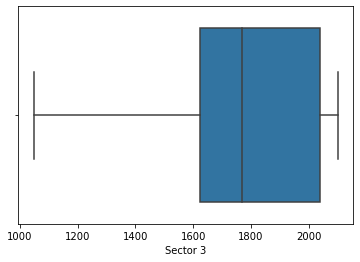

In [11]:
sb.boxplot(d_train['Sector 3'])

- There is No Outlier in $Sector 3$

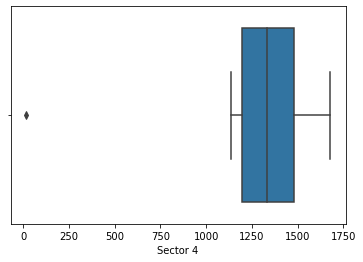

In [12]:
sb.boxplot(d_train['Sector 4'])

In [13]:
q1 = d_train['Sector 4'].quantile(0.25)
q3 = d_train['Sector 4'].quantile(0.75) 
iqr = q3 - q1
print(iqr)
UB = q3 + 1.5 * iqr
LB = q1 - 1.5 * iqr

print('Outlier in Upper Bound: ',len(d_train[d_train['Sector 4']>UB]))
print('Outlier in Lower Bound: ',len(d_train[d_train['Sector 4']<LB]))
print(UB,'&',LB)
print("The min value is",d_train["Sector 4"].min(),"& The max value is ",d_train["Sector 4"].max())

282.41009999999983
Outlier in Upper Bound:  0
Outlier in Lower Bound:  1
1901.2151499999995 & 771.5747500000003
The min value is 14.58 & The max value is  1678.51


### Feature Scalling on train data:

In [14]:
#X = d_train.iloc[:, 2:].values
X = d_train[['Sector 1','Sector 2','Sector 4']]
y = d_train[['Sector 3']]

X = X.values
y = y.values

In [15]:
X.shape , y.shape

((1049, 3), (1049, 1))

#### Use RobustScaler for Normalization if you want to reduce the effects of outliers, relative to MinMaxScaler.

In [16]:
from sklearn.preprocessing import RobustScaler
sc_X = RobustScaler()

X = sc_X.fit_transform(X)
X

array([[ 0.06280276, -0.77799382, -0.20583541],
       [ 0.02758501, -0.77799382, -0.32105792],
       [ 0.02758501, -0.77799382, -0.32105792],
       ...,
       [-1.22173123,  0.91930687, -0.66205139],
       [-1.18010264,  1.04374929, -0.65479245],
       [-1.18010264,  1.04374929, -0.65479245]])

## Importing the "test.csv" dataset :

In [17]:
d_test = pd.read_csv('fs1_test.csv')

d_test.head()

,serial_number,time_stamp,Sector 1,Sector 2,Sector 4
0,1,2019-01-14,1411.0200,835.83,1756.5500
1,2,2019-01-11,1406.7500,837.81,1748.4100
2,3,2019-01-10,1406.8400,822.97,1740.2800
3,4,2019-01-09,1403.1801,822.97,1724.0000
4,5,2019-01-08,1408.4600,834.57,1719.9301


In [18]:
d_test.shape

(698, 5)

In [19]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   serial_number  698 non-null    int64  
 1   time_stamp     698 non-null    object 
 2   Sector 1       698 non-null    float64
 3   Sector 2       698 non-null    float64
 4   Sector 4       698 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 27.4+ KB


In [20]:
d_test.isnull().sum()

serial_number    0
time_stamp       0
Sector 1         0
Sector 2         0
Sector 4         0
dtype: int64

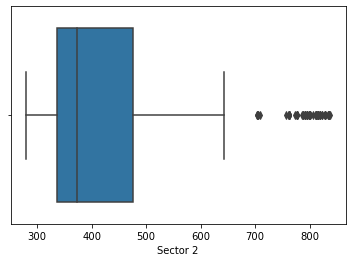

In [21]:
sb.boxplot(d_test['Sector 2'])

## No outlier in sector 1 and 4

In [22]:
q1 = d_test['Sector 2'].quantile(0.25)
q3 = d_test['Sector 2'].quantile(0.75) 
iqr = q3 - q1
print(iqr)
UB = q3 + 1.5 * iqr
LB = q1 - 1.5 * iqr

print('Outlier in Upper Bound: ',len(d_test[d_test['Sector 2']>UB]))
print('Outlier in Lower Bound: ',len(d_test[d_test['Sector 2']<LB]))
print(UB,'&',LB)
print("The min value is",d_test['Sector 2'].min(),"& The max value is ",d_test['Sector 2'].max())

140.36
Outlier in Upper Bound:  81
Outlier in Lower Bound:  0
686.4000000000001 & 124.95999999999998
The min value is 279.15 & The max value is  837.81


In [61]:
d_test.head()

,serial_number,Sector 1,Sector 2,Sector 4
0,1,1411.0200,835.83,1756.5500
1,2,1406.7500,837.81,1748.4100
2,3,1406.8400,822.97,1740.2800
3,4,1403.1801,822.97,1724.0000
4,5,1408.4600,834.57,1719.9301


In [23]:
test_data = d_test.iloc[:, 2:5]
test_data.head()

,Sector 1,Sector 2,Sector 4
0,1411.0200,835.83,1756.5500
1,1406.7500,837.81,1748.4100
2,1406.8400,822.97,1740.2800
3,1403.1801,822.97,1724.0000
4,1408.4600,834.57,1719.9301


### Split into train and test :

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.665, 
                                                    random_state = 0)

In [26]:
X_test.shape , y_test.shape

((698, 3), (698, 1))

In [27]:
X_train.shape , y_train.shape

((351, 3), (351, 1))

In [28]:
X_test.shape , test_data.shape

((698, 3), (698, 3))

## Linear Regression :

In [29]:
# Train the linear regression model on the Training set

from sklearn.linear_model import LinearRegression
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
### prediction on train dataset:

y_pred_lr = regressor_LR.predict(X_test) #X_train
np.set_printoptions(precision=2)

In [31]:
y_pred_lr.shape

(698, 1)

In [32]:
from sklearn.metrics import r2_score , mean_squared_error

print('RMSE :',np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print('R-sqr score :',r2_score(y_test, y_pred_lr)*100)



#print('RMSE :',np.sqrt(mean_squared_error(y_train, y_pred_lr)))

#print('R-sqr score :',r2_score(y_train, y_pred_lr)*100)

RMSE : 97.49306311000412
R-sqr score : 76.23093272589252


## Random Forest :

In [67]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 10, random_state = 0, verbose=1, n_jobs=-1)
regressor_RF.fit(X_train, y_train)

C:\Users\Vishal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=1,
                      warm_start=False)

In [68]:
y_pred_rf = regressor_RF.predict(X_test)
np.set_printoptions(precision=2)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [69]:
X_test.shape, test_data.shape

((698, 3), (698, 3))

In [70]:
y_pred_rf.shape

(698,)

In [71]:
from sklearn.metrics import r2_score, mean_squared_error

print('RMSE :',np.sqrt(mean_squared_error(y_test, y_pred_rf)))   # for train data

print('R-sqr score :',r2_score(y_test, y_pred_rf)*100)

RMSE : 24.255636992575884
R-sqr score : 98.52873779892667


#### Prediction on 'test-data' :

In [72]:
y_pred_rf_test = regressor_RF.predict(test_data)

print('RMSE on test data :',np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))    # for test data

RMSE on test data : 251.40071897320144


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


## Decision Tree regression :

In [73]:
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(random_state = 0)
regressor_DT.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [74]:
#y_pred_dt_test = regressor_DT.predict(X_test)

y_pred_dt_test = regressor_DT.predict(test_data)

In [75]:
print('RMSE :',np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))    # for test data

RMSE : 323.29655462428445


## Importing the sample_submission.csv :

In [76]:
sample = pd.read_csv('fs1_sample_submission.csv')

In [95]:
sample['Sector 4'] = y_pred_rf_test

- here i took Random Forest predicted values because it has less RMSE score

In [96]:
result = sample.drop(['Sector 3'], axis = 1) 
result.rename(columns={'Sector 4':'Sector 3'}, inplace=True)

In [97]:
final_result = result
final_result = final_result.round({"Sector 3":4})
#final_result = final_result.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'], axis = 1)
final_result.head()

,serial_number,Sector 3
0,1,1954.019
1,2,1954.019
2,3,1954.019
3,4,1954.019
4,5,1954.019


In [98]:
final_result.to_csv('fs1_final_sample_submission.csv')